# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

<h3> Prepare data to be loaded into a dataframe </h3>

In [1]:
%matplotlib inline
from __future__ import division 
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import common_funcs as cf

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.6+ KB
None


<h3>Observations:</h3>
<ol>
<li> No Missing values :-)
<li> Total of 130 entries
<li> Gender is of type string. It can be converted into data type category
</ol>

In [4]:
# Convert gender into type category
df.gender = df.gender.astype("category")

<h3>Is the distribution of body temperatures normal? </h3>
<ol>
<li> First we do the visual inspection of data</li>
<li> Second we perform Normality tests</li
</ol>

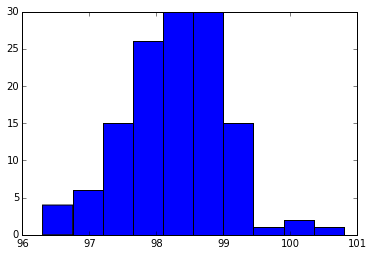

In [5]:
# Do a simple plot of the temperature distribution
plt.hist(df.temperature)
plt.show()

<h3> Observations </h3>
from initial observation it looks like it is close to normal distribution. Need to do further Data Analysis.

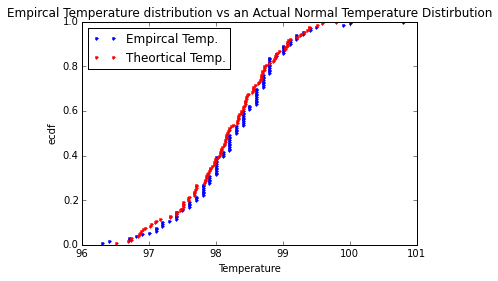

In [6]:
#Let us plot a cumulative distribution of the temperature 
#overlay it with a normal distribution of the same mean and standard deviation of temp.
x_emp, y_emp = cf.ecdf(df.temperature)
plt.plot(x_emp, y_emp, marker=".", linestyle="none", color="blue")
mean_temp = df.temperature.mean()
std_temp = df.temperature.std()
normal_dist = np.random.normal(mean_temp, std_temp, len(df.temperature))
x_theor, y_theor = cf.ecdf(normal_dist)
plt.plot(x_theor, y_theor , marker=".", linestyle="none", color="red")

plt.xlabel("Temperature")
plt.ylabel("ecdf")
plt.title("Empircal Temperature distribution vs an Actual Normal Temperature Distirbution")
plt.legend(("Empircal Temp.","Theortical Temp."), loc="upper left")
plt.show()

<h3> Observation </h3>
Closely matches the normal distribution. Let us generate 100 normal distributions of the same mean and standard deviation of the temperature

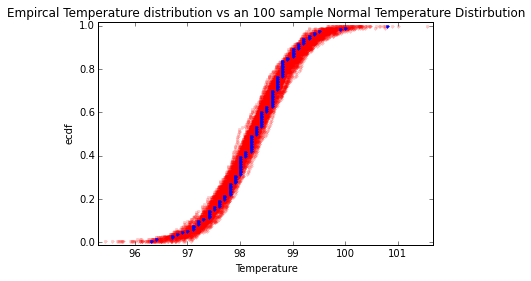

In [7]:
#Generate 100 normal distribution samples of the same mean and std of the 
#temprature and plot them
for _ in range(100):
    normal_dist = np.random.normal(mean_temp, std_temp, len(df.temperature))
    x_theor, y_theor = cf.ecdf(normal_dist)
    plt.plot(x_theor, y_theor , marker=".", linestyle="none", color="red", alpha=0.2)
    
#Plot the orginal temperature distribution
plt.plot(x_emp, y_emp, marker=".", linestyle="none", color="blue")
plt.xlabel("Temperature")
plt.ylabel("ecdf")
plt.title("Empircal Temperature distribution vs an 100 sample Normal Temperature Distirbution")
plt.margins(2/100)
plt.show()

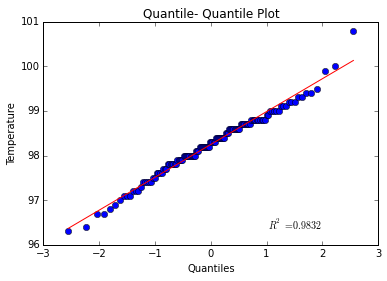

In [8]:
# Do a quantitle quantile Plot
stats.probplot(df.temperature, dist='norm', plot=plt)
plt.xlabel('Quantiles')
plt.ylabel('Temperature')
plt.title ("Quantile- Quantile Plot")
plt.show()

<h3>1) Is the distribution of body temperatures normal?</h3>
The actual temperature distribution falls with the range of possible theortical distibutions.
Visually we can conclude that the Temperature is normally distributed.
<font>Let us  perform normality Tests</font>

In [9]:
# Kolmogorov-Smirnov (K-S) test . 
# Under the KS Test null hypothesis is that the distribution is normal
statistic, p_value = stats.kstest(df.temperature.values, "norm")
print 'KS Test- Test Statistic:', statistic, ' p-value:', p_value

#TODO: Callout the Null Hypothesis.
statistic, p_value = stats.normaltest(df.temperature.values)
print 'Normal Test- Test Statistic:', statistic, ' p-value:', p_value

statistic, p_value = stats.shapiro(df.temperature.values)
print 'Shaipro- Test Statistic:', statistic, ' p-value:', p_value


KS Test- Test Statistic: 1.0  p-value: 0.0
Normal Test- Test Statistic: 2.70380143332  p-value: 0.258747986349
Shaipro- Test Statistic: 0.986577451229  p-value: 0.233191400766


<h3><font color='green'>Conclusion</font></h3>
<font color='green'>The Visual tests and the tests of normality show that the temperature is normally distributed</font>

<h3>2) Is the sample size large? Are the observations independent? </h3>
Is the sample size large?<br>
Yes. A sample size greater than 30 is considered to be a large enough sample size
Are the observations independent?
Observations are independent if each observation is taken independent of each other and are identically distributed (IID).


<h3> 3) Is the true population mean really 98.6 degrees F? </h3>
    <ul>
    <li><font color='green'> Would you use a one-sample or two-sample test? Why?<br>
         <i>Since we are dealing with only one sample of temperature and since we are comparing the sample with a population mean, we will do the one -sample test</font></i>
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? <br>
          <font color='green'>t-statistic is calculated when the sample size is less than 30 and the standard deviation of the population is known. This is a rather unusua cases in which we do not know the standard deviation and the sample size is large. we will go ahead and use the t-statistic</font></i>
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

In [10]:
t_statistic,p_value = stats.ttest_1samp(df.temperature,98.6)
print "p_value=", p_value
print "t_statistic=", t_statistic

p_value= 2.41063204156e-07
t_statistic= -5.45482329236


<h3>Observation</h3>
The p value is very small and hence the null Hypothesis (temperature of sample is equal to 98.6) can be rejected. <font color="green">In other words The true population mean based on this sample is not 98.6 F</font </h3>

In [11]:
z_stat,p_value = cf.z_statistic(df.temperature,98.6,np.std(df.temperature))
print "p_value=", p_value
print "z_statistic=", z_stat

p_value= 2.17615758249e-08
z_statistic= -5.47592520212


<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
        <font color="green">T - Statistic is the right one to use since sample is less than 30.</font>
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li> 

In [12]:
#draw sample size of 10
#TODO: why do i use choice. Does it break independence.
samp_10 = np.random.choice(df.temperature,10)
t_statistic, p_value = stats.ttest_1samp(samp_10,98.6)
print "p_value=", p_value
print "t_statistic=", t_statistic

p_value= 0.00448945173721
t_statistic= -3.75935719426


<font color="green">We notice that the p_value is statistically signicant and we cannot reject the null hypothesis.

<li> 5) At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>

In [13]:
# Assume 99% confidence interval
# MOE = 2.58 * Standard error
#dof=df.temperature.shape[0]-1
dof = df.temperature.shape[0] - 1
print "Degrees of Freedom:", dof
critcal_value = stats.t.ppf(0.995,dof)
print "critcal_value:" ,critcal_value
s = np.std(df.temperature, ddof=1)
print "standard deviation of sample: ", s
se = s / np.sqrt(df.temperature.shape[0] - 1)
print "Standard Mean Error:", se
moe = critcal_value * se
print "Margin of Error = ", moe
print "Mean temp:", mean_temp
#Anything above and below the two times SE can be considered abnormal temp
print "Normal temperature limits = [" , mean_temp-moe ,",", mean_temp+moe, "]"

Degrees of Freedom: 129
critcal_value: 2.6144786797
standard deviation of sample:  0.733183158034
Standard Mean Error: 0.0645531775994
Margin of Error =  0.16877290654
Mean temp: 98.2492307692
Normal temperature limits = [ 98.0804578627 , 98.4180036758 ]


<font color="green">Any temperature below 98.08 and above 98.41 can be considered abnormal</font>

<li> 6) Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?.
    <font color="green">Used the T-test of independence, since males and female observations are independent of each other.</font>
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>

In [14]:
female_temp=df[df.gender=='F']["temperature"]
male_temp=df[df.gender=='M']["temperature"]
t_statistic, p_value = stats.ttest_ind(female_temp,male_temp)
print "p_value=", p_value
print "t_statistic=", t_statistic
#TODO: try and do a mean test

p_value= 0.0239318831224
t_statistic= 2.28543453817


The p_value is < 0.05 and hence the null hypothesis(There is no difference in temperature between the two samples) can be rejected. <font color="green">There a significant difference between males and females in normal temperature </font>

<h3>Write a story with your conclusion in the context of the original problem.</h3>
<i>The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?</i>
<font color="green"> Based on the data sample, the mean temperature of the population as a point estimate is 98.24. With a confidence interval of 99% the mean temperature range is  98.08 , 98.41]</font>